# Import libraries

In [558]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from pandas.plotting import scatter_matrix
import missingno as msn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Load and Check data

In [559]:
df=pd.read_csv('C:\\Users\\natiq\\Desktop\California Housing Prices\\housing.csv')

In [560]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [562]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [563]:
df.shape

(20640, 10)

In [564]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [565]:
inds=df[df['ocean_proximity']=='ISLAND'].index

df.drop(inds, axis=0, inplace=True)

In [566]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

In [567]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20635.0,-119.569999,2.003685,-124.3500,-121.8000,-118.5000,-118.0100,-114.3100
latitude,20635.0,35.632412,2.135918,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,20635.0,28.636152,12.583924,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,20635.0,2636.020208,2181.794772,2.0000,1448.0000,2127.0000,3148.0000,39320.0000
total_bedrooms,20428.0,537.899305,421.425970,1.0000,296.0000,435.0000,647.0000,6445.0000
population,20635.0,1425.660286,1132.530137,3.0000,787.0000,1166.0000,1725.0000,35682.0000
households,20635.0,499.593700,382.357072,1.0000,280.0000,409.0000,605.0000,6082.0000
median_income,20635.0,3.870944,1.899961,0.4999,2.5631,3.5352,4.7437,15.0001
median_house_value,20635.0,206813.756288,115372.499511,14999.0000,119600.0000,179700.0000,264700.0000,500001.0000


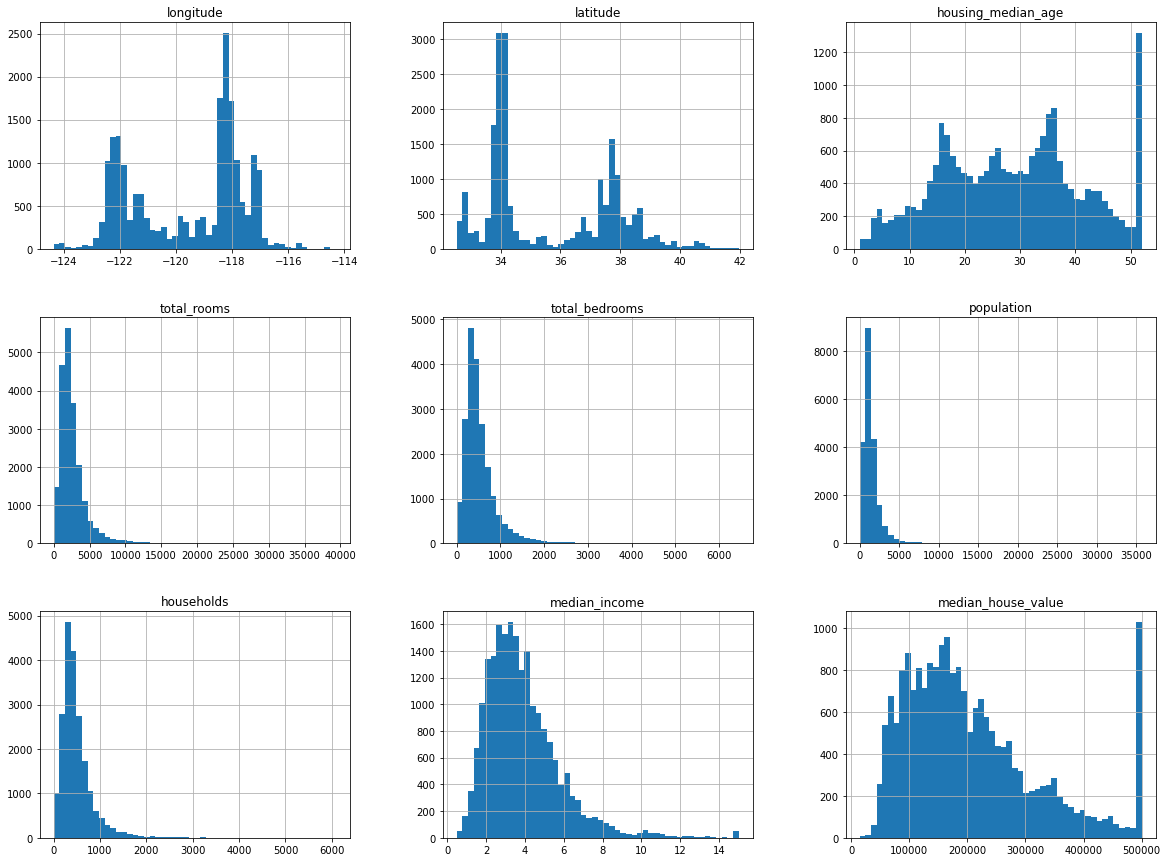

In [568]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Missing Value

In [569]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

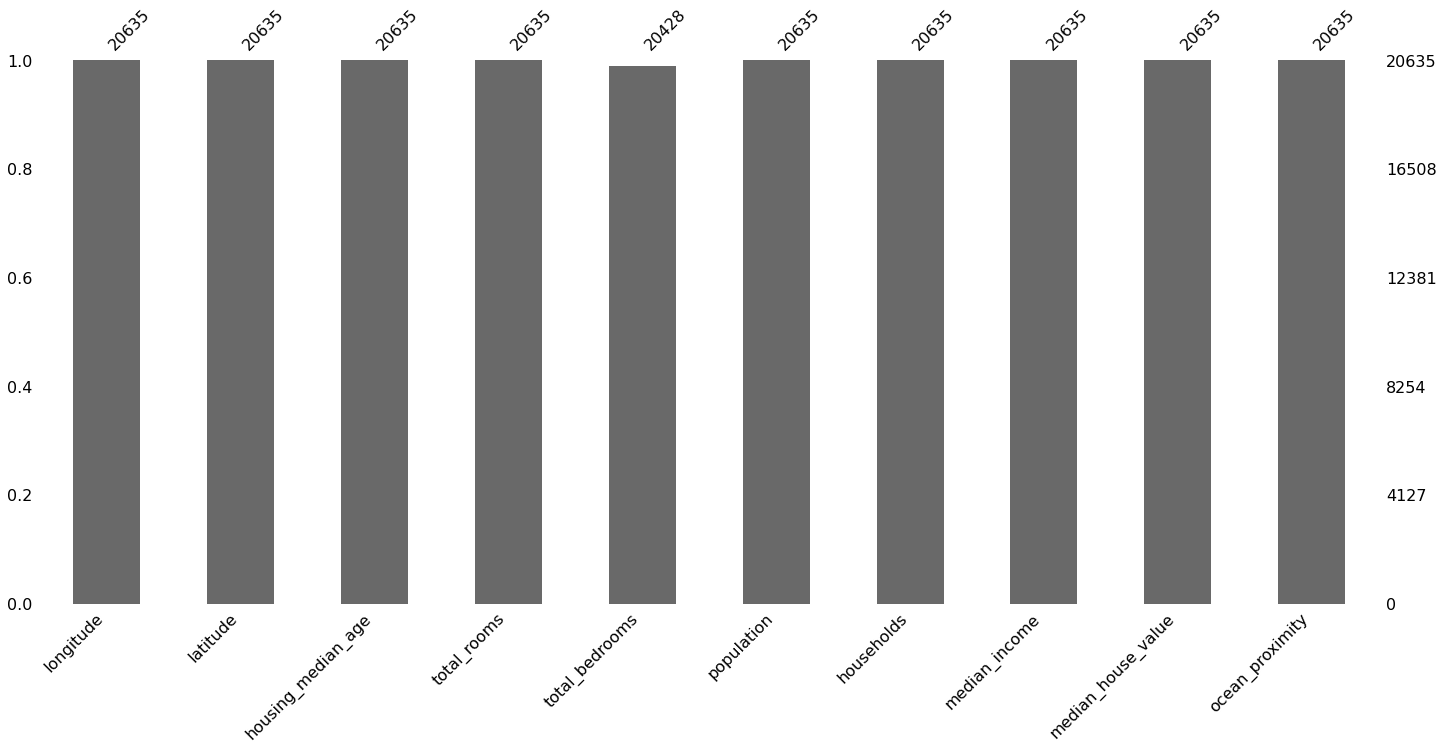

In [570]:
msn.bar(df)

In [571]:
df=df.dropna()

In [572]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Split Training and Testing Data

In [573]:
df['income_cat']=pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                       labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

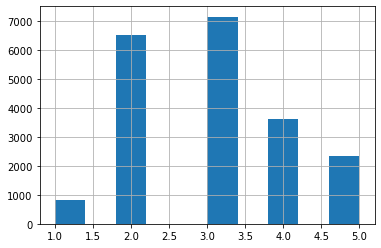

In [574]:
df['income_cat'].hist()

In [575]:
train_data, test_data=train_test_split(df, test_size=0.2, random_state=42, stratify=df['income_cat'])

In [576]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3638,-118.43,34.22,34.0,1588.0,360.0,1080.0,340.0,3.6600,184600.0,<1H OCEAN,3
9483,-123.23,39.33,20.0,804.0,121.0,448.0,140.0,3.9632,147100.0,<1H OCEAN,3
11595,-118.07,33.80,34.0,3486.0,507.0,1311.0,503.0,7.1221,384500.0,<1H OCEAN,5
521,-122.23,37.76,52.0,2269.0,323.0,805.0,321.0,4.7188,335300.0,NEAR BAY,4
14017,-117.16,32.75,49.0,1566.0,494.0,643.0,419.0,1.9637,137500.0,NEAR OCEAN,2


In [577]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13482,-117.35,34.12,22.0,5640.0,889.0,3157.0,887.0,4.1581,126500.0,INLAND,3
10496,-117.66,33.50,16.0,1956.0,346.0,862.0,326.0,4.4732,186300.0,<1H OCEAN,3
3431,-118.44,34.27,35.0,777.0,187.0,1022.0,186.0,3.4000,139600.0,<1H OCEAN,3
7697,-118.12,33.96,34.0,2863.0,451.0,1243.0,466.0,6.0723,297200.0,<1H OCEAN,5
16142,-122.46,37.77,52.0,3193.0,688.0,2099.0,681.0,3.9375,402900.0,NEAR BAY,3


In [578]:
train_data['income_cat'].value_counts(normalize=True)

3    0.350263
2    0.318749
4    0.176784
5    0.114368
1    0.039836
Name: income_cat, dtype: float64

In [579]:
test_data['income_cat'].value_counts(normalize=True)

3    0.350220
2    0.318649
4    0.176701
5    0.114537
1    0.039892
Name: income_cat, dtype: float64

In [580]:
train_data.drop('income_cat', axis=1, inplace=True)
test_data.drop('income_cat', axis=1, inplace=True)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

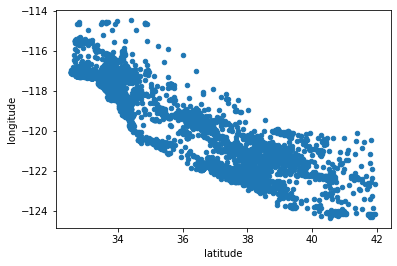

In [581]:
train_data.plot(kind='scatter', x='latitude', y='longitude')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

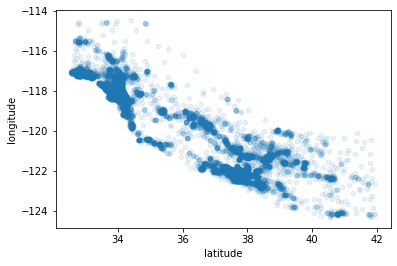

In [582]:
train_data.plot(kind='scatter', x='latitude', y='longitude', alpha=0.1)

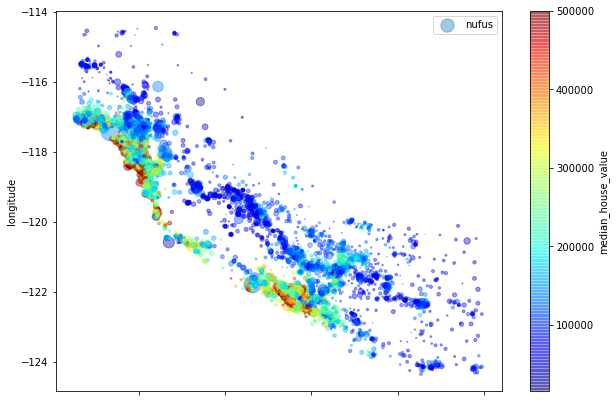

In [583]:
train_data.plot(kind='scatter', x='latitude', y='longitude', alpha=0.4,
            s=train_data['population']/100, label='nufus', figsize=(10, 7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

# Correlation

In [584]:
corr_matrix=train_data.corr()

In [585]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923741,-0.110368,0.046255,0.070711,0.100317,0.057092,-0.016222,-0.049382
latitude,-0.923741,1.000000,0.012715,-0.038438,-0.069342,-0.110366,-0.073392,-0.078474,-0.142218
housing_median_age,-0.110368,0.012715,1.000000,-0.357376,-0.318591,-0.293088,-0.301388,-0.110613,0.110217
total_rooms,0.046255,-0.038438,-0.357376,1.000000,0.929752,0.857425,0.919617,0.198064,0.135444
total_bedrooms,0.070711,-0.069342,-0.318591,0.929752,1.000000,0.875865,0.980506,-0.006578,0.053555
population,0.100317,-0.110366,-0.293088,0.857425,0.875865,1.000000,0.904683,0.005722,-0.021356
households,0.057092,-0.073392,-0.301388,0.919617,0.980506,0.904683,1.000000,0.013857,0.068606
median_income,-0.016222,-0.078474,-0.110613,0.198064,-0.006578,0.005722,0.013857,1.000000,0.686647
median_house_value,-0.049382,-0.142218,0.110217,0.135444,0.053555,-0.021356,0.068606,0.686647,1.000000


In [586]:
corr_matrix['median_house_value']

longitude            -0.049382
latitude             -0.142218
housing_median_age    0.110217
total_rooms           0.135444
total_bedrooms        0.053555
population           -0.021356
households            0.068606
median_income         0.686647
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [587]:
attributes=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

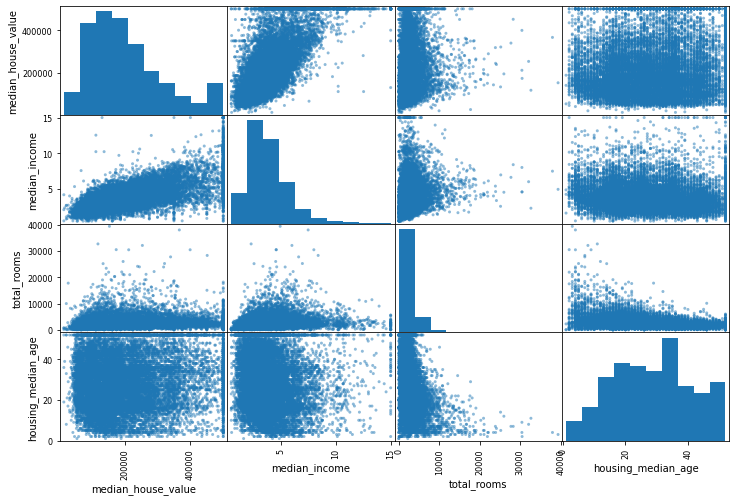

In [588]:
scatter_matrix(train_data[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

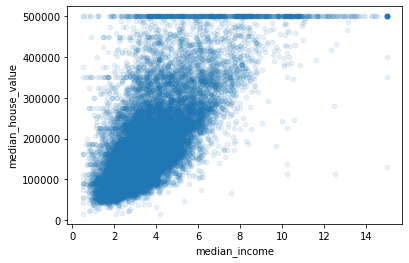

In [589]:
train_data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

# Feature Engineering

In [590]:
def new_cols(housing):
    housing['rooms_per_household']=housing['total_rooms']/housing['households']
    housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
    housing['population_per_household']=housing['population']/housing['households']
    return housing

In [591]:
train_data=new_cols(train_data)
test_data=new_cols(test_data)

In [592]:
corr_matrix=train_data.corr()

In [593]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686647
rooms_per_household         0.143207
total_rooms                 0.135444
housing_median_age          0.110217
households                  0.068606
total_bedrooms              0.053555
population_per_household   -0.019612
population                 -0.021356
longitude                  -0.049382
latitude                   -0.142218
bedrooms_per_room          -0.257087
Name: median_house_value, dtype: float64

In [594]:
Y_test=test_data['median_house_value']
test_data.drop('median_house_value', axis=1, inplace=True)

In [595]:
Y_test.head()

13482    126500.0
10496    186300.0
3431     139600.0
7697     297200.0
16142    402900.0
Name: median_house_value, dtype: float64

In [596]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
13482,-117.35,34.12,22.0,5640.0,889.0,3157.0,887.0,4.1581,INLAND,6.358512,0.157624,3.559188
10496,-117.66,33.50,16.0,1956.0,346.0,862.0,326.0,4.4732,<1H OCEAN,6.000000,0.176892,2.644172
3431,-118.44,34.27,35.0,777.0,187.0,1022.0,186.0,3.4000,<1H OCEAN,4.177419,0.240669,5.494624
7697,-118.12,33.96,34.0,2863.0,451.0,1243.0,466.0,6.0723,<1H OCEAN,6.143777,0.157527,2.667382
16142,-122.46,37.77,52.0,3193.0,688.0,2099.0,681.0,3.9375,NEAR BAY,4.688693,0.215471,3.082232


# EDA

In [597]:
num_vars=list(train_data._get_numeric_data().columns)

print(f'Numeric variables: {num_vars}')

Numeric variables: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [598]:
cat_vars=list(set(train_data.columns)-set(num_vars))

print(f'Categoric variable: {cat_vars}')

Categoric variable: ['ocean_proximity']


### Categorical Variable Analysis

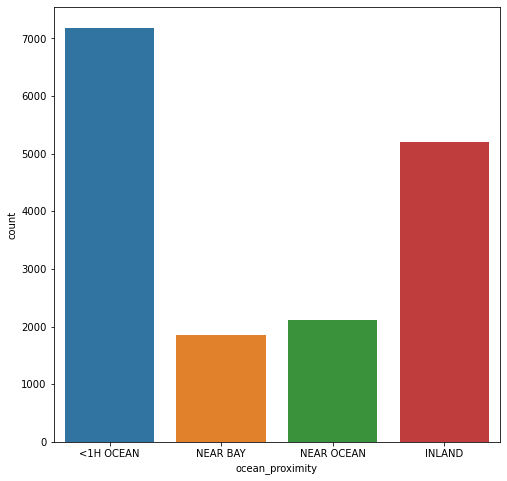

In [599]:
plt.figure(figsize=[8, 8])
sns.countplot(x='ocean_proximity', data=train_data)
plt.show()

In [600]:
def hist_plot(df, variable):
    plt.figure(figsize=(9, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f"{variable} distribution with hist")
    plt.show()

longitude


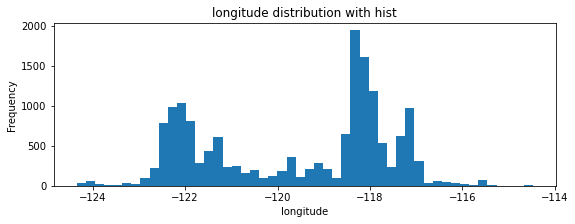

latitude


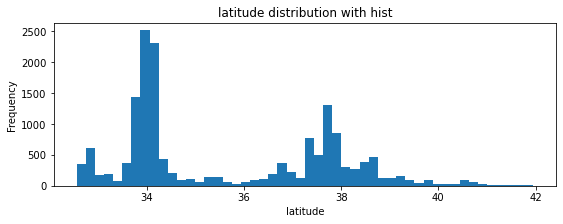

housing_median_age


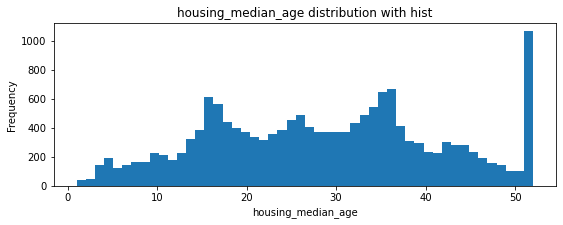

total_rooms


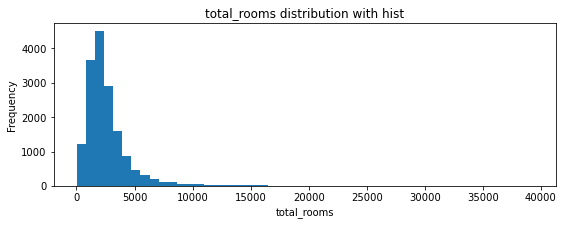

total_bedrooms


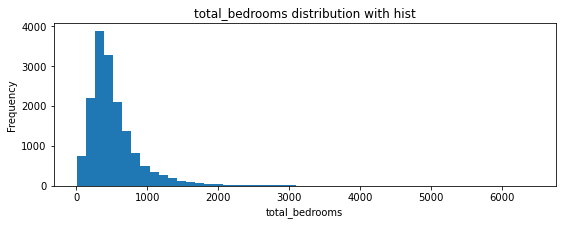

population


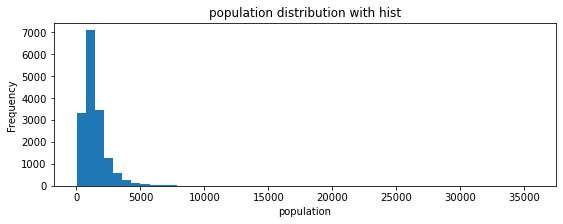

households


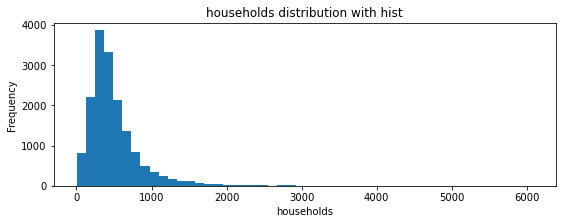

median_income


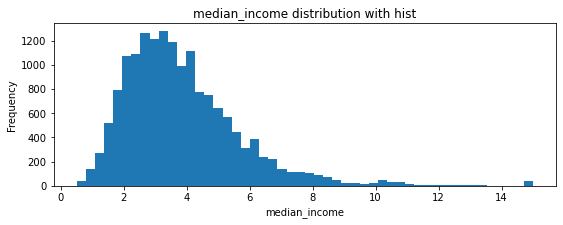

median_house_value


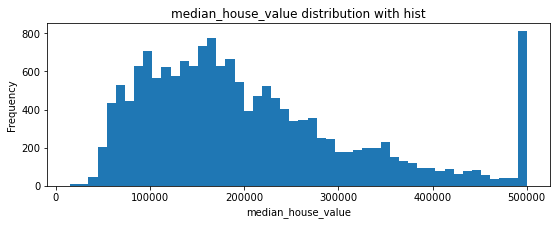

rooms_per_household


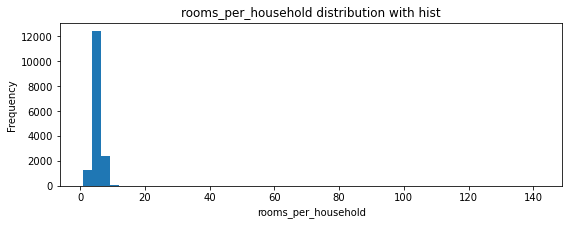

bedrooms_per_room


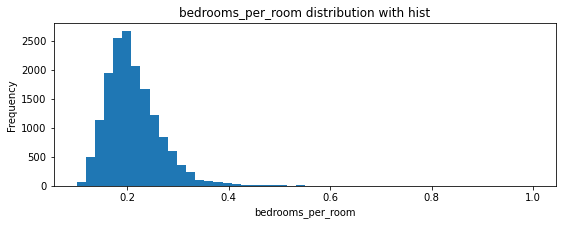

population_per_household


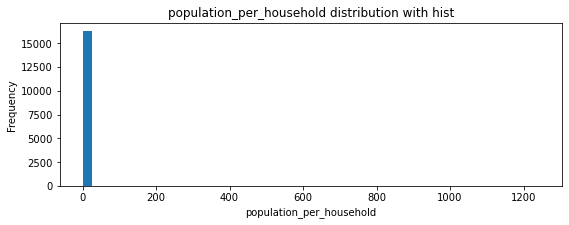

In [601]:
for num in num_vars:
    print(num)
    hist_plot(train_data, num)

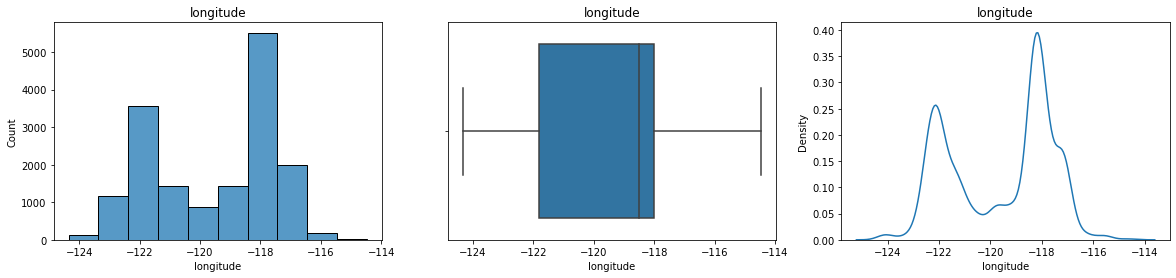

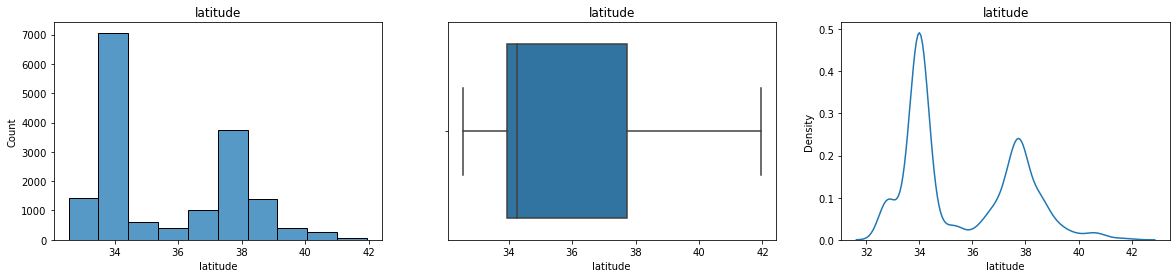

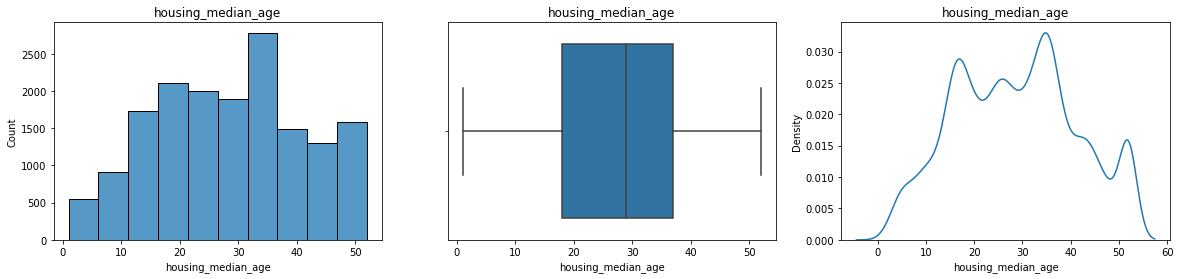

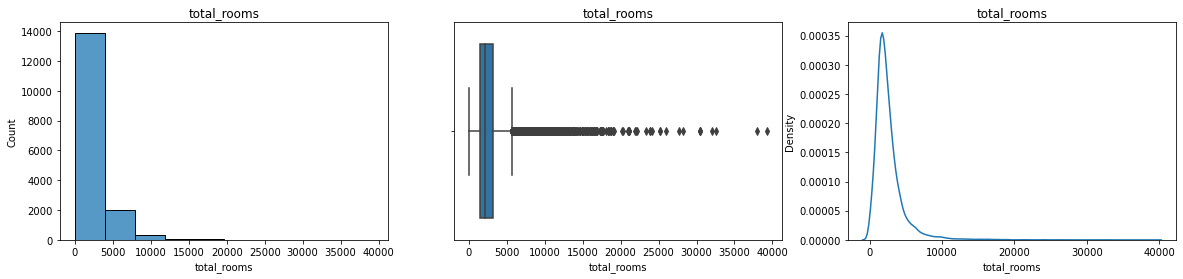

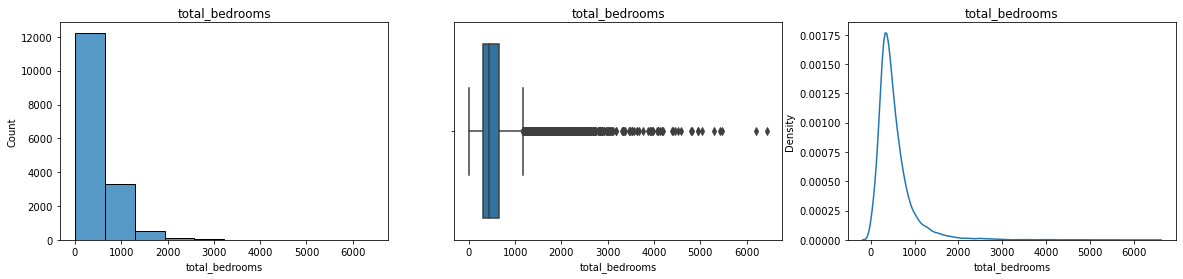

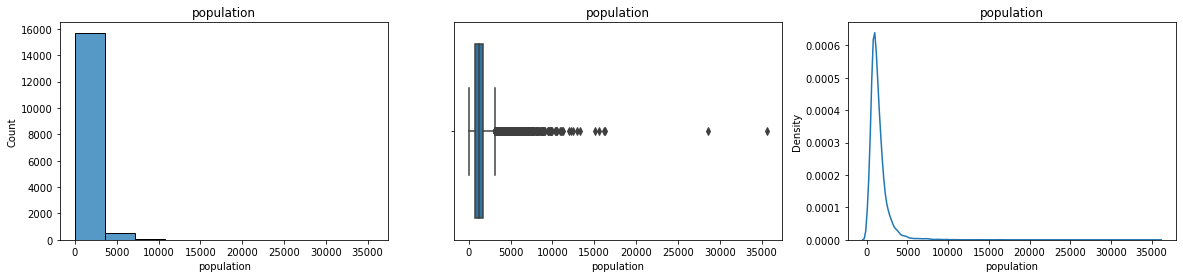

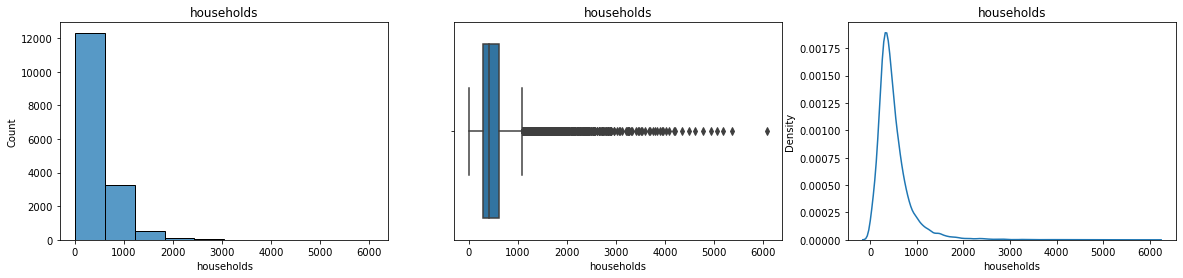

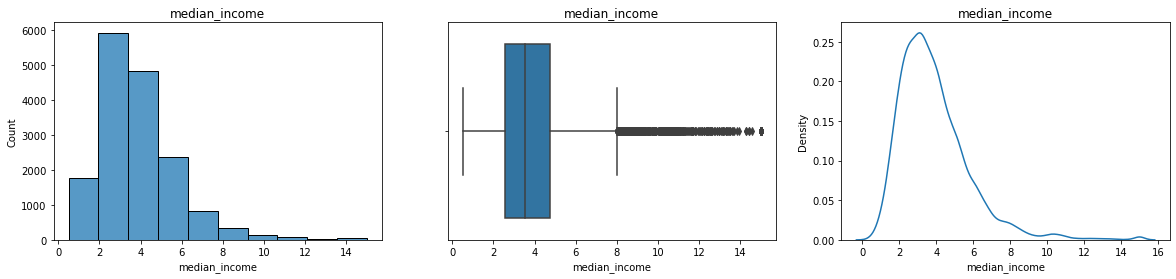

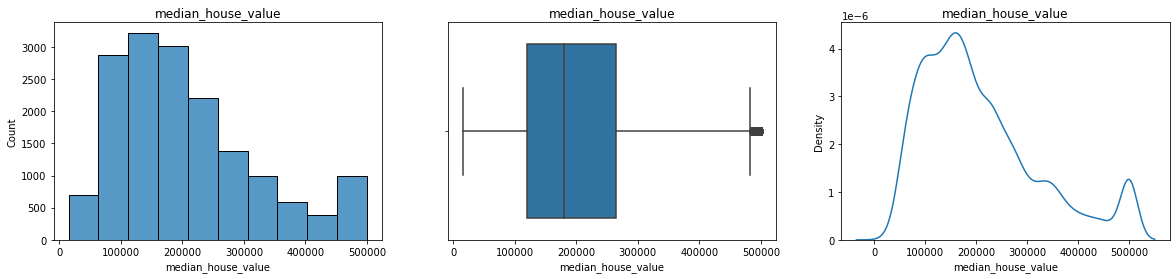

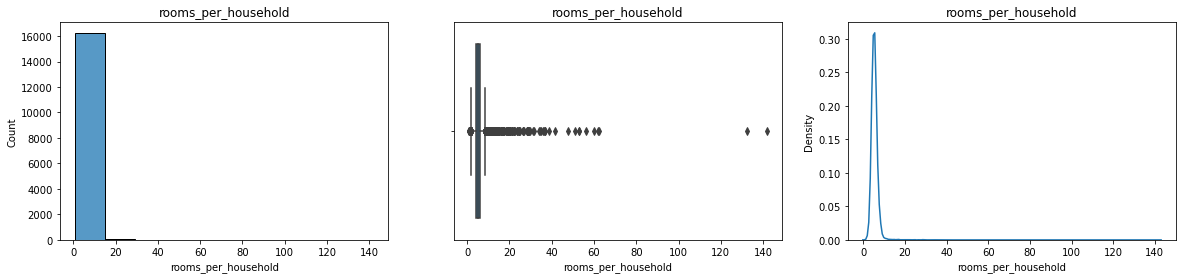

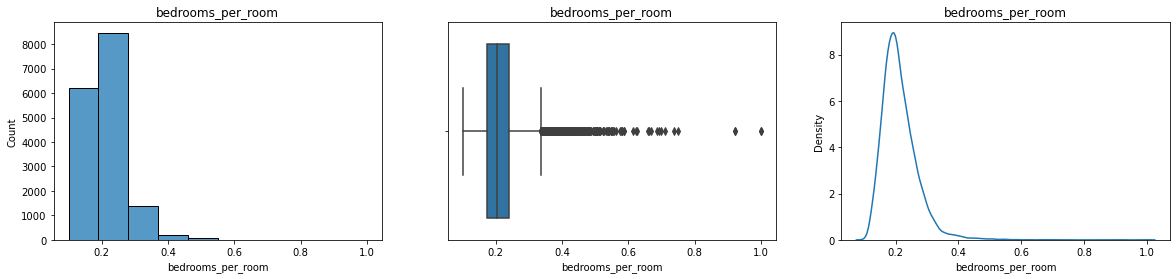

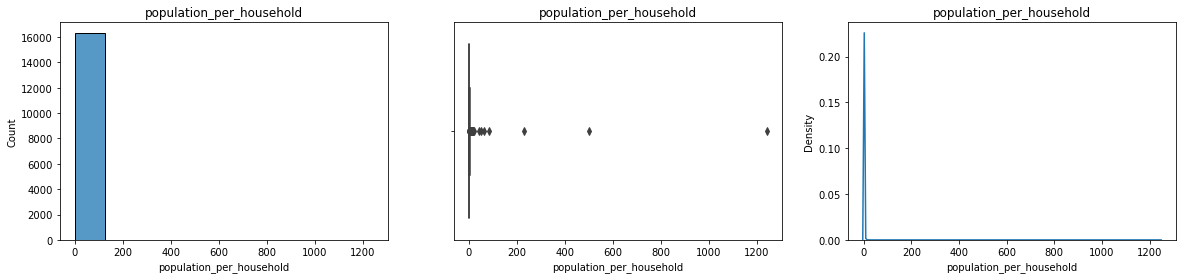

In [602]:
for i in num_vars:

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    sns.histplot(train_data[i], bins=10, ax=axes[0])
    axes[0].set_title(i)
    
    sns.boxplot(train_data[i], ax=axes[1])
    axes[1].set_title(i)
   
    sns.kdeplot(train_data[i], ax=axes[2])
    axes[2].set_title(i)
    plt.show()

# Encoder

In [603]:
train_data=pd.get_dummies(train_data, drop_first=True)
test_data=pd.get_dummies(test_data, drop_first=True)

In [604]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3638,-118.43,34.22,34.0,1588.0,360.0,1080.0,340.0,3.6600,184600.0,4.670588,0.226700,3.176471,0,0,0
9483,-123.23,39.33,20.0,804.0,121.0,448.0,140.0,3.9632,147100.0,5.742857,0.150498,3.200000,0,0,0
11595,-118.07,33.80,34.0,3486.0,507.0,1311.0,503.0,7.1221,384500.0,6.930417,0.145439,2.606362,0,0,0
521,-122.23,37.76,52.0,2269.0,323.0,805.0,321.0,4.7188,335300.0,7.068536,0.142353,2.507788,0,1,0
14017,-117.16,32.75,49.0,1566.0,494.0,643.0,419.0,1.9637,137500.0,3.737470,0.315453,1.534606,0,0,1


In [605]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13482,-117.35,34.12,22.0,5640.0,889.0,3157.0,887.0,4.1581,6.358512,0.157624,3.559188,1,0,0
10496,-117.66,33.50,16.0,1956.0,346.0,862.0,326.0,4.4732,6.000000,0.176892,2.644172,0,0,0
3431,-118.44,34.27,35.0,777.0,187.0,1022.0,186.0,3.4000,4.177419,0.240669,5.494624,0,0,0
7697,-118.12,33.96,34.0,2863.0,451.0,1243.0,466.0,6.0723,6.143777,0.157527,2.667382,0,0,0
16142,-122.46,37.77,52.0,3193.0,688.0,2099.0,681.0,3.9375,4.688693,0.215471,3.082232,0,1,0


# Splitting

In [606]:
X_train=train_data.drop('median_house_value', axis=1)
Y_train=train_data['median_house_value']

In [607]:
print(X_train.shape)
print(test_data.shape)

(16342, 14)
(4086, 14)


In [608]:
print(Y_train.shape)
print(Y_test.shape)

(16342,)
(4086,)


# Model

In [609]:
def train_show_results(model, X_train, Y_train, X_test, Y_test):
    
    model.fit(X_train, Y_train)
    train_preds = model.predict(X_train)
    test_preds= model.predict(X_test)
    
    train_error=np.sqrt(mean_squared_error(Y_train, train_preds))
    
    scores=-cross_val_score(model, X_train, Y_train, 
                      scoring='neg_mean_squared_error', cv=10)
    scores_mean=scores.mean()
        
    test_error=np.sqrt(mean_squared_error(Y_test, test_preds))
    
    return type(model).__name__, train_error, ('%.2f'%scores_mean), ('%.2f'%test_error), r2_score(Y_test, test_preds)

In [610]:
models=[LinearRegression(), Lasso(), Ridge(), ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]
results={'model':[], 'train_rmse':[], 'cross_val_score': [], 'test_rmse':[], 'r2_score':[]}

In [611]:
for model in models:
    res=train_show_results(model, X_train, Y_train, test_data, Y_test)
    results['model'].append(res[0])
    results['train_rmse'].append(res[1])
    results['cross_val_score'].append(res[2])
    results['test_rmse'].append(res[3])
    results['r2_score'].append(res[4])

In [612]:
results=pd.DataFrame(results)
results

,model,train_rmse,cross_val_score,test_rmse,r2_score
0,LinearRegression,68171.398019,4697666276.22,66783.23,0.660429
1,Lasso,68171.404340,4697631698.20,66783.89,0.660422
2,Ridge,68172.847764,4697290399.00,66795.44,0.660305
3,ElasticNet,71799.756813,5200336245.08,70211.44,0.624671
4,DecisionTreeRegressor,0.000000,4951588366.72,70007.54,0.626848
5,RandomForestRegressor,18664.575065,2538070988.88,48479.64,0.821057
6,SVR,118738.298973,14106163501.27,117651.65,-0.053882


# Model tuning

In [613]:
rf_param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}
clf = GridSearchCV(RandomForestRegressor(), param_grid=rf_param_grid, cv = StratifiedKFold(n_splits = 10), 
                       scoring = "neg_mean_squared_error", n_jobs = -1,verbose = 1)
clf.fit(X_train, Y_train)
final_model=clf.best_estimator_
final_model.fit(X_train, Y_train)
test_preds=final_model.predict(test_data)
rmse=np.sqrt(mean_squared_error(Y_test, test_preds))
r2=r2_score(Y_test, test_preds)
print(f"RMSE: {rmse}\nR2: {r2}")

Fitting 10 folds for each of 96 candidates, totalling 960 fits
RMSE: 47798.00463655598
R2: 0.8260535876406105
